In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import math

In [3]:
import numpy as np

In [4]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
import matplotlib.pyplot as plt
plt.ioff()

In [6]:
import seaborn as sns
sns.set()

In [7]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import data.analysis_tools as tools

# Data Preparation

In [9]:
num_runs = 10
num_roads = 4
num_timesteps = 1000

## Loading

In [10]:
T = np.empty((1, 1000))
T[0] = np.linspace(1, 1000, 1000)

In [11]:
D = np.zeros((num_runs, num_roads, num_timesteps))
for run in range(1, num_runs + 1):
    D[run-1] = np.loadtxt("raw/route_choice/dis/run{}.txt".format(run)).T

## Error Calculation

In [12]:
def root_mean_square(X, expected=np.array([10, 20, 30, 40])):
    n = len(X)
    return math.sqrt(sum((x-y)**2 for x,y in zip(X, expected)))

In [13]:
E = np.zeros((num_runs, num_timesteps))

In [14]:
for run in range(num_runs):
    for timestep in range(num_timesteps):
        E[run][timestep] = root_mean_square(D[run].T[timestep])

# Data Visualization

<IPython.core.display.Javascript object>


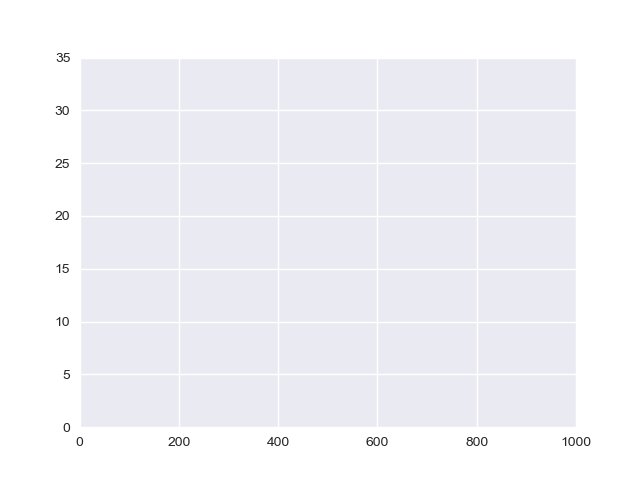

<IPython.core.display.Javascript object>


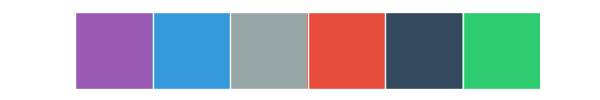

In [26]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(colors))
plt.show()

In [16]:
plot_lim = 25

In [17]:
_, ax = plt.subplots()

In [18]:
plt.xlim(1, plot_lim)
plt.ylim(1, 50);

In [19]:
for i in range(4):
    sns.regplot(x=T[0][:plot_lim],
                y=D[0][i][:plot_lim],
                ax=ax,
                ci=95,
                marker="+",
                n_boot=1000,
                scatter=False,
                color=colors[i])

<IPython.core.display.Javascript object>


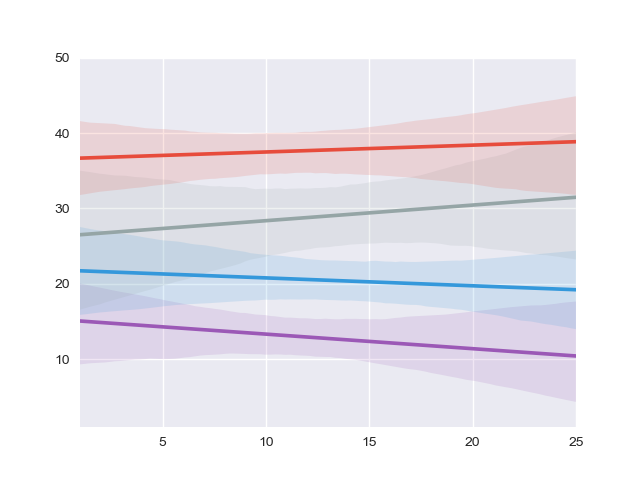

In [20]:
plt.show()

## Root Mean Square Error

In [21]:
plot_lim = 1000

In [22]:
_, ax = plt.subplots()

In [23]:
plt.xlim(1, plot_lim)
plt.ylim(0, 35);

In [24]:
# plt.plot(E[0])

In [35]:
def train_test_split(X, Y):
    print(X)
    X_train = X[0:100] + X[200:300] + X[400:500] + X[600:700] + X[800:900]
    X_test = X[100:200] + X[300:400] + X[500:600] + X[700:800] + X[900:1000]
    
    Y_train = Y[0:100] + Y[200:300] + Y[400:500] + Y[600:700] + Y[800:900]
    Y_test = Y[100:200] + Y[300:400] + Y[500:600] + Y[700:800] + Y[900:1000]
    return X_train, X_test, Y_train, Y_test
    

In [45]:
X_train, X_test, y_train, y_test = train_test_split(T_train.T, E[0])

[[ 2005.]
 [ 2010.]
 [ 2015.]
 [ 2020.]
 [ 2025.]
 [ 2030.]
 [ 2035.]
 [ 2040.]
 [ 2045.]
 [ 2050.]
 [ 2055.]
 [ 2060.]
 [ 2065.]
 [ 2070.]
 [ 2075.]
 [ 2080.]
 [ 2085.]
 [ 2090.]
 [ 2095.]
 [ 2100.]
 [ 2105.]
 [ 2110.]
 [ 2115.]
 [ 2120.]
 [ 2125.]
 [ 2130.]
 [ 2135.]
 [ 2140.]
 [ 2145.]
 [ 2150.]
 [ 2155.]
 [ 2160.]
 [ 2165.]
 [ 2170.]
 [ 2175.]
 [ 2180.]
 [ 2185.]
 [ 2190.]
 [ 2195.]
 [ 2200.]
 [ 2205.]
 [ 2210.]
 [ 2215.]
 [ 2220.]
 [ 2225.]
 [ 2230.]
 [ 2235.]
 [ 2240.]
 [ 2245.]
 [ 2250.]
 [ 2255.]
 [ 2260.]
 [ 2265.]
 [ 2270.]
 [ 2275.]
 [ 2280.]
 [ 2285.]
 [ 2290.]
 [ 2295.]
 [ 2300.]
 [ 2305.]
 [ 2310.]
 [ 2315.]
 [ 2320.]
 [ 2325.]
 [ 2330.]
 [ 2335.]
 [ 2340.]
 [ 2345.]
 [ 2350.]
 [ 2355.]
 [ 2360.]
 [ 2365.]
 [ 2370.]
 [ 2375.]
 [ 2380.]
 [ 2385.]
 [ 2390.]
 [ 2395.]
 [ 2400.]
 [ 2405.]
 [ 2410.]
 [ 2415.]
 [ 2420.]
 [ 2425.]
 [ 2430.]
 [ 2435.]
 [ 2440.]
 [ 2445.]
 [ 2450.]
 [ 2455.]
 [ 2460.]
 [ 2465.]
 [ 2470.]
 [ 2475.]
 [ 2480.]
 [ 2485.]
 [ 2490.]
 [ 2495.]
 [ 2500.]]

ValueError: operands could not be broadcast together with shapes (100,1) (0,1) 

In [34]:
T_train, T_test, E_train, E_test = X_train.T, X_test.T, y_train.T, y_test.T

In [37]:
model = tools.PolynomialRegression(T_train, E_train)

In [38]:
model = model.process(degree=5)

In [39]:
plt.plot(T_train.flatten(), model.predict())

In [40]:
y_res = model.predict(T_test)

In [41]:
r2_score(y_test, y_res) 

-623.67870269723346

<IPython.core.display.Javascript object>


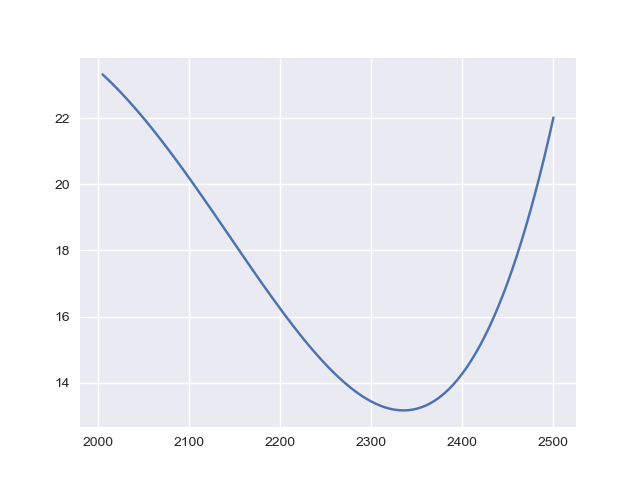

In [42]:
plt.show()

In [ ]:
plt.close()